In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist


Using TensorFlow backend.


In [2]:
(x_trai, y_trai), (x_test, y_test) = mnist.load_data()


In [3]:
y_trai=np.eye(10,dtype=float)[y_trai]
y_test=np.eye(10,dtype=float)[y_test]
x_trai=x_trai/255.0
x_test=x_test/255.0

In [4]:
y_trai.shape


(60000, 10)

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x_trai,y_trai,test_size = 0.081,random_state=256)


In [6]:
x_train.shape[0]%100

40

In [7]:
# NETWORK TOPOLOGIES
n_hidden_1 = 256 
n_hidden_2 = 128 
n_input    = 784 
n_classes  = 10  

# INPUTS AND OUTPUTS
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])
    
# NETWORK PARAMETERS
stddev = 0.1
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1], stddev=stddev)),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev=stddev)),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes], stddev=stddev))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}
print ("NETWORK READY")

NETWORK READY


In [8]:

layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['b1'])) 
layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))

In [9]:
# PREDICTION
pred = (tf.matmul(layer_2, weights['out']) + biases['out'])

# LOSS AND OPTIMIZER
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y)) 
# optm = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost) 
optm = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost) 
corr = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))    
accr = tf.reduce_mean(tf.cast(corr, "float"))

# INITIALIZER
init = tf.initialize_all_variables()
print ("FUNCTIONS READY")

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Use `tf.global_variables_initializer` instead.
FUNCTIONS READY


In [10]:
n_b=0
def next_batch(batch_size):
    remove=batch_size
    global n_b
    n_b+=batch_size
    if n_b>x_train.shape[0]:
        remove=x_train.shape[0]%batch_size
        n_b=x_train.shape[0]
    
    return x_train[n_b-remove:n_b],y_train[n_b-remove:n_b]
  

In [11]:
import time
# PARAMETERS
training_epochs = 20
batch_size      = 128
display_step    = 1
num_examples=y_train.shape[0]
# LAUNCH THE GRAPH
sess = tf.Session()
sess.run(init)
# OPTIMIZE

for epoch in range(training_epochs):
    start=time.time()
    avg_cost = 0.
    total_batch = int(num_examples/batch_size)
    if num_examples%batch_size!=0:
        total_batch+=1
    n_b=0
    # ITERATION
    for i in range(total_batch):
      
        batch_xs, batch_ys = next_batch(batch_size)
        batch_xs=[x.flatten() for x in batch_xs]
        feeds = {x: batch_xs, y: batch_ys}
        sess.run(optm, feed_dict=feeds)
        avg_cost += sess.run(cost, feed_dict=feeds)
    avg_cost = avg_cost / total_batch
    # DISPLAY
    end=time.time()
    if (epoch+1) % display_step == 0:
        print ("Time : %d s " % (int(end-start)))
        
        print ("Epoch: %03d/%03d cost: %.9f" % (epoch, training_epochs, avg_cost))
        feeds = {x: batch_xs, y: batch_ys}
        train_acc = sess.run(accr, feed_dict=feeds)
        print ("TRAIN ACCURACY: %.3f" % (train_acc))
        feeds = {x: [x.flatten() for x in x_val], y:y_val}
        test_acc = sess.run(accr, feed_dict=feeds)
        print ("TEST ACCURACY: %.3f" % (test_acc))
print ("OPTIMIZATION FINISHED")

Time : 2 s 
Epoch: 000/020 cost: 0.294212509
TRAIN ACCURACY: 0.930
TEST ACCURACY: 0.953
Time : 2 s 
Epoch: 001/020 cost: 0.104678341
TRAIN ACCURACY: 0.960
TEST ACCURACY: 0.963
Time : 2 s 
Epoch: 002/020 cost: 0.065268614
TRAIN ACCURACY: 0.960
TEST ACCURACY: 0.967
Time : 2 s 
Epoch: 003/020 cost: 0.042823482
TRAIN ACCURACY: 0.990
TEST ACCURACY: 0.970
Time : 2 s 
Epoch: 004/020 cost: 0.028920290
TRAIN ACCURACY: 0.990
TEST ACCURACY: 0.972
Time : 2 s 
Epoch: 005/020 cost: 0.019986022
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.974
Time : 2 s 
Epoch: 006/020 cost: 0.014418530
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.975
Time : 2 s 
Epoch: 007/020 cost: 0.009822622
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.976
Time : 2 s 
Epoch: 008/020 cost: 0.007960221
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.974
Time : 2 s 
Epoch: 009/020 cost: 0.006766480
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.975
Time : 2 s 
Epoch: 010/020 cost: 0.006318867
TRAIN ACCURACY: 1.000
TEST ACCURACY: 0.977
Time : 2 s 
Epoch: 011/020 cost:

In [12]:
feeds = {x: [x.flatten() for x in x_train[[0,1]]]}
qq=sess.run(layer_1, feed_dict=feeds)

In [13]:
qq.shape

(2, 256)

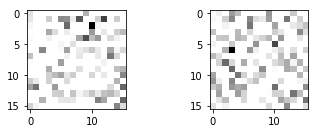

In [17]:
plt.subplot(221)
plt.imshow(qq[0].reshape(16,16),cmap='binary')
plt.subplot(222)
plt.imshow(qq[1].reshape(16,16),cmap='binary')



In [15]:
pppp=[x.flatten() for x in x_train[[0,1]]]

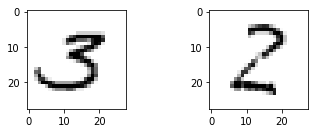

In [18]:
plt.subplot(221)
plt.imshow(pppp[0].reshape(28,28),cmap='binary')
plt.subplot(222)
plt.imshow(pppp[1].reshape(28,28),cmap='binary')


In [20]:
ww=sess.run(weights)

In [21]:
ww

{'h1': array([[ 0.01097392,  0.02746812,  0.13842821, ..., -0.22425385,
         -0.1078051 , -0.16505198],
        [-0.0246955 , -0.06503264,  0.20534456, ...,  0.10117456,
          0.03050031, -0.01778282],
        [ 0.17044722, -0.02499465,  0.20225595, ...,  0.20749448,
         -0.03343303, -0.10795917],
        ...,
        [ 0.05977937,  0.14921783,  0.06976761, ..., -0.19138785,
         -0.0746579 , -0.04545359],
        [-0.06740233, -0.05181646,  0.06613322, ...,  0.0867492 ,
          0.06335331,  0.00918245],
        [-0.19304514,  0.10897265, -0.22647952, ...,  0.01747353,
          0.06775787, -0.0677257 ]], dtype=float32),
 'h2': array([[ 0.02874967,  0.24142018,  0.04351602, ..., -0.09198254,
         -0.0140974 , -0.02070002],
        [-0.28031313, -0.10267979,  0.2409485 , ...,  0.17432709,
         -0.0958815 ,  0.01056853],
        [ 0.09869963,  0.04513283,  0.07135221, ...,  0.10547787,
         -0.13249457, -0.08408241],
        ...,
        [-0.0756873 , -0.04